# Tensorflow (v1.10)
TensorFlow™ is an open source software library for numerical computation using data flow graphs.

In [1]:
# import tensorflow
import tensorflow as tf

## Table of Contents
1. [Basic](#1.-Basic)
2. [Normal Loading](#2.-Normal-Loading)
3. [Lazy Loading](#3.-Lazy-Loading)
4. [Complete Program](#4.-Complete-Program)
5. [Linear Regression in Tensorflow](#5.-Linear-Regression-in-Tensorflow)
6. [Logistic Regression in Tensorflow](#6.-Logistic-Regression-in-Tensorflow)
7. [Logistic Regression in Tensorflow (Improved Accuracy)](#7.-Logistic-Regression-in-Tensorflow-%28Improved-Accuracy%29)
8. [Word2Vec](#8.-Word2Vec)
9. [Word2Vec Visualize](#9.-Word2Vec-Visualize)

#### 1. Basic

In [2]:
# reset the default graph
tf.reset_default_graph()

# constant
a = tf.constant(3, name='a')
b = tf.constant(3, name='b')
c = tf.add(a, b, name='sum')

# variables
s = tf.Variable(2, name="scalar") 
m = tf.Variable([[0, 1], [2, 3]], name="matrix") 
W = tf.Variable(tf.zeros([784,10]), name="big_matrix")

# placeholders
q = tf.placeholder(tf.int32, shape=None, name="q")

# write summary for tensorboard
writer = tf.summary.FileWriter('summary/basic', tf.get_default_graph())

with tf.Session() as sess:
    print('Sum of constant is: ', sess.run(c))
    print('Placeholder c is: ', sess.run(q, feed_dict = {q : 1}))

writer.close()

Sum of constant is:  6
Placeholder c is:  1


#### 2. Normal Loading

In [3]:
# reset the default graph
tf.reset_default_graph()

x = tf.Variable(10, name='x')
y = tf.Variable(20, name='y')
z = tf.add(x, y)        # create the node before executing the graph

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # summary for tensorboard
    writer = tf.summary.FileWriter('summary/normal_loading', sess.graph)
    
    for _ in range(5):
        print(sess.run(z))

writer.close()

# uncomment to see graph def (here Add op will be added 1 time only in graph)
# print tf.get_default_graph().as_graph_def()

30
30
30
30
30


#### 3. Lazy Loading

In [4]:
# reset the default graph
tf.reset_default_graph()

x = tf.Variable(10, name='x')
y = tf.Variable(20, name='y')


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for _ in range(5):
        print(sess.run(tf.add(x, y))) # someone decides to be clever to save one line of code
        
    # summary for tensorboard (I've added this after running the seesion to see the effect of lazy loading)
    writer = tf.summary.FileWriter('summary/lazy_loading', sess.graph)

writer.close()

# uncomment to see the graph def (here Add op will be added 5 times in graph)
# print tf.get_default_graph().as_graph_def()

30
30
30
30
30


#### 4. Complete Program

In [5]:
#train data
x = tf.constant([[1], [2], [3], [4]], dtype=tf.float32)

#train label
y_true = tf.constant([[0], [-1], [-2], [-3]], dtype=tf.float32)

y_pred = tf.layers.dense(x, units = 1)

#loss metric
loss = tf.losses.mean_squared_error(labels=y_true, predictions=y_pred)

#loss optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # training 100 steps
    for i in range(100):
        _, loss_value = sess.run([train, loss])
    
    # loss value
    print('loss value at last step: {}'.format(loss_value))

    # predicted labels
    print(sess.run(y_pred))

loss value at last step: 0.14925916492938995
[[-0.62195325]
 [-1.301379  ]
 [-1.9808047 ]
 [-2.6602304 ]]


#### 5. Linear Regression in Tensorflow
- X: birth rate
- Y: life expectancy
- Find a linear relationship between X and Y, to predict Y from X

<img src="images/linear_regression.png">

In [6]:
# read the data from data/birth_life_2010.txt (in my case)
import numpy as np
import time


def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    
    return data, n_samples

In [7]:
# reset the default graph
tf.reset_default_graph()

# Step 1: read in data from the .txt file
data, n_samples = read_birth_life_data('data/birth_life_2010.txt')

In [8]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float
X = tf.placeholder(dtype=tf.float32, shape=None, name='X')
Y = tf.placeholder(dtype=tf.float32, shape=None, name='Y')

In [9]:
# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
w = tf.get_variable('weight', dtype=None, shape=None, initializer=0.0)
b = tf.get_variable('bias', dtype=None, shape=None, initializer=0.0)

In [10]:
# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
# Y_predicted = None
Y_predicted = w * X + b

In [11]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

In [12]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
start = time.time()

In [13]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(init)
    
    # Create a filewriter to write the model's graph to TensorBoard
    writer = tf.summary.FileWriter('summary/linear_regresssion', sess.graph)
    
    for i in range(101):
        total_loss = 0
        for x, y in data:
            # Execute train_op and get the value of loss.
            # Don't forget to feed in data for placeholders
            _, loss_value = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += loss_value
        
        if i % 20 == 0:
            # print loss at each 20th Epoch
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    
    # close the writer when you're done using it
    writer.close()
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b])

print('Took: {0} seconds'.format(time.time() - start))

Epoch 0: 1661.863764550287
Epoch 20: 119.20935661137888
Epoch 40: 37.305592010505066
Epoch 60: 30.524589418089263
Epoch 80: 30.04458791257593
Epoch 100: 30.036051805281865
Took: 10.035122871398926 seconds


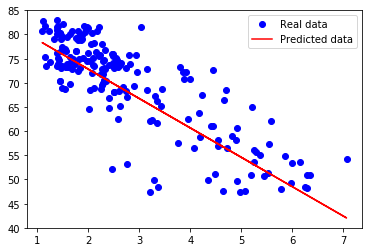

In [14]:
# the following lines to see the plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

#### 6. Logistic Regression in Tensorflow
- MNIST Database (Each image is a 28x28 array, flattened out to be a 1-d tensor of size 784)
- X: image of a handwritten digit
- Y: the digit value
- Recognize the digit in the image

<img src="images/logistic_regression.png">

In [15]:
import os
import gzip
import shutil
import struct
import urllib
import numpy as np
import time


def safe_mkdir(path):
    """ Create a directory if there isn't one already. """
    try:
        os.mkdir(path)
    except OSError:
        pass


def download_one_file(download_url, 
                    local_dest, 
                    expected_byte=None, 
                    unzip_and_remove=False):
    """ 
    Download the file from download_url into local_dest
    if the file doesn't already exists.
    If expected_byte is provided, check if 
    the downloaded file has the same number of bytes.
    If unzip_and_remove is True, unzip the file and remove the zip file
    """
    if os.path.exists(local_dest) or os.path.exists(local_dest[:-3]):
        print('%s already exists' %local_dest)
    else:
        print('Downloading %s' %download_url)
        local_file, _ = urllib.urlretrieve(download_url, local_dest)
        file_stat = os.stat(local_dest)
        if expected_byte:
            if file_stat.st_size == expected_byte:
                print('Successfully downloaded %s' %local_dest)
                if unzip_and_remove:
                    with gzip.open(local_dest, 'rb') as f_in, open(local_dest[:-3],'wb') as f_out:
                        shutil.copyfileobj(f_in, f_out)
                    os.remove(local_dest)
            else:
                print('The downloaded file has unexpected number of bytes')


def download_mnist(path):
    """ 
    Download and unzip the dataset mnist if it's not already downloaded 
    Download from http://yann.lecun.com/exdb/mnist
    """
    safe_mkdir(path)
    url = 'http://yann.lecun.com/exdb/mnist'
    filenames = ['train-images-idx3-ubyte.gz',
                'train-labels-idx1-ubyte.gz',
                't10k-images-idx3-ubyte.gz',
                't10k-labels-idx1-ubyte.gz']
    expected_bytes = [9912422, 28881, 1648877, 4542]

    for filename, byte in zip(filenames, expected_bytes):
        download_url = os.path.join(url, filename)
        local_dest = os.path.join(path, filename)
        download_one_file(download_url, local_dest, byte, True)
        

def parse_data(path, dataset, flatten):
    if dataset != 'train' and dataset != 't10k':
        raise NameError('dataset must be train or t10k')

    label_file = os.path.join(path, dataset + '-labels-idx1-ubyte')
    with open(label_file, 'rb') as file:
        _, num = struct.unpack(">II", file.read(8))
        labels = np.fromfile(file, dtype=np.int8) #int8
        new_labels = np.zeros((num, 10))
        new_labels[np.arange(num), labels] = 1
    
    img_file = os.path.join(path, dataset + '-images-idx3-ubyte')
    with open(img_file, 'rb') as file:
        _, num, rows, cols = struct.unpack(">IIII", file.read(16))
        imgs = np.fromfile(file, dtype=np.uint8).reshape(num, rows, cols) #uint8
        imgs = imgs.astype(np.float32) / 255.0
        if flatten:
            imgs = imgs.reshape([num, -1])

    return imgs, new_labels


def read_mnist(path, flatten=True, num_train=55000):
    """
    Read in the mnist dataset, given that the data is stored in path
    Return two tuples of numpy arrays
    ((train_imgs, train_labels), (test_imgs, test_labels))
    """
    imgs, labels = parse_data(path, 'train', flatten)
    indices = np.random.permutation(labels.shape[0])
    train_idx, val_idx = indices[:num_train], indices[num_train:]
    train_img, train_labels = imgs[train_idx, :], labels[train_idx, :]
    val_img, val_labels = imgs[val_idx, :], labels[val_idx, :]
    test = parse_data(path, 't10k', flatten)
    
    return (train_img, train_labels), (val_img, val_labels), test

In [16]:
# Define paramaters for the model
learning_rate = 0.1
batch_size = 128
n_epochs = 30
n_train = 60000
n_test = 10000

In [17]:
# reset the default graph
tf.reset_default_graph()

# Step 1: Read in data
mnist_folder = 'data/mnist'
download_mnist(mnist_folder)
train, val, test = read_mnist(mnist_folder, flatten=True)

data/mnist\train-images-idx3-ubyte.gz already exists
data/mnist\train-labels-idx1-ubyte.gz already exists
data/mnist\t10k-images-idx3-ubyte.gz already exists
data/mnist\t10k-labels-idx1-ubyte.gz already exists


In [18]:
# Step 2: Create datasets and iterator
# create training Dataset and batch it
train_data = tf.data.Dataset.from_tensor_slices(train)
train_data = train_data.shuffle(10000) # if you want to shuffle your data
train_data = train_data.batch(batch_size)

# create testing Dataset and batch it
test_data = tf.data.Dataset.from_tensor_slices(test)
test_data = test_data.batch(batch_size)

# create one iterator and initialize it with different datasets
iterator = tf.data.Iterator.from_structure(train_data.output_types, 
                                           train_data.output_shapes)
img, label = iterator.get_next()

train_init = iterator.make_initializer(train_data) # initializer for train_data
test_init = iterator.make_initializer(test_data) # initializer for train_data

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y

w = tf.get_variable('weight', shape=[784, 10], initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
b = tf.get_variable('bias', shape=[1, 10], initializer=tf.zeros_initializer())

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(img, w) + b

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=label, logits=logits)
loss = tf.reduce_mean(entropy)

# Step 6: define optimizer
# using Adamn Optimizer with pre-defined learning rate to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

# Step 7: calculate accuracy with test set
preds = tf.nn.softmax(logits)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(label, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

writer = tf.summary.FileWriter('summary/logreg', tf.get_default_graph())
with tf.Session() as sess:
   
    start_time = time.time()
    sess.run(tf.global_variables_initializer())

    # train the model n_epochs times
    for i in range(n_epochs + 1):
        sess.run(train_init) # drawing samples from train_data
        total_loss = 0
        n_batches = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss])
                total_loss += l
                n_batches += 1
        except tf.errors.OutOfRangeError:
            pass
        
        if i % 10 == 0:
            # print loss after every 10th epoch
            print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
            
    print('Total time: {0} seconds'.format(time.time() - start_time))

    # test the model
    sess.run(test_init) # drawing samples from test_data
    total_correct_preds = 0
    try:
        while True:
            accuracy_batch = sess.run(accuracy)
            total_correct_preds += accuracy_batch
    except tf.errors.OutOfRangeError:
        pass

    print('Accuracy {0}'.format(total_correct_preds/n_test))
writer.close()

Average loss epoch 0: 0.3668709104490835
Average loss epoch 10: 0.2649705114579478
Average loss epoch 20: 0.25902860464398253
Average loss epoch 30: 0.2536010127081427
Total time: 69.29058146476746 seconds
Accuracy 0.917


#### 7. Logistic Regression in Tensorflow (Improved Accuracy)
- MNIST Database (Each image is a 28x28 array, flattened out to be a 1-d tensor of size 784)
- X: image of a handwritten digit
- Y: the digit value
- Recognize the digit in the image

<img src='images/logistic_regression_mnist.png'>

In [19]:
# Define paramaters for the model
learning_rate = 0.1
batch_size = 128
n_epochs = 30
n_train = 60000
n_test = 10000

In [20]:
# reset the default graph
tf.reset_default_graph()

# Step 1: Read in data
mnist_folder = 'data/mnist'
download_mnist(mnist_folder)
train, val, test = read_mnist(mnist_folder, flatten=True)

data/mnist\train-images-idx3-ubyte.gz already exists
data/mnist\train-labels-idx1-ubyte.gz already exists
data/mnist\t10k-images-idx3-ubyte.gz already exists
data/mnist\t10k-labels-idx1-ubyte.gz already exists


In [21]:
# Step 2: Create datasets and iterator
# create training Dataset and batch it
train_data = tf.data.Dataset.from_tensor_slices(train)
train_data = train_data.shuffle(10000) # if you want to shuffle your data
train_data = train_data.batch(batch_size)

# create testing Dataset and batch it
test_data = tf.data.Dataset.from_tensor_slices(test)
test_data = test_data.batch(batch_size)

# create one iterator and initialize it with different datasets
iterator = tf.data.Iterator.from_structure(train_data.output_types, 
                                           train_data.output_shapes)
img, label = iterator.get_next()

train_init = iterator.make_initializer(train_data) # initializer for train_data
test_init = iterator.make_initializer(test_data) # initializer for train_data

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y

w_1 = tf.get_variable('weight_1', shape=[784, 200], initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
b_1 = tf.get_variable('bias_1', shape=[1, 200], initializer=tf.zeros_initializer())

w_2 = tf.get_variable('weight_2', shape=[200, 10], initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
b_2 = tf.get_variable('bias_2', shape=[1, 10], initializer=tf.zeros_initializer())

# w_3 = tf.get_variable('weight_3', shape=[100, 60], initializer=tf.random_normal_initializer(mean=0.0, stddev=0.01))
# b_3 = tf.get_variable('bias_3', shape=[1, 60], initializer=tf.zeros_initializer())

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
# to get the probability distribution of possible label of the image
# DO NOT DO SOFTMAX HERE

hidden_1 = tf.nn.relu(tf.matmul(img, w_1) + b_1)
# hidden_2 = tf.nn.relu(tf.matmul(hidden_1, w_2) + b_2)
logits = tf.matmul(hidden_1, w_2) + b_2

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=label, logits=logits)
loss = tf.reduce_mean(entropy)

# Step 6: define optimizer
# using Adamn Optimizer with pre-defined learning rate to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

# Step 7: calculate accuracy with test set
preds = tf.nn.softmax(logits)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(label, 1))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

# writer = tf.summary.FileWriter('summary/logreg_acc', tf.get_default_graph())
with tf.Session() as sess:
   
    start_time = time.time()
    sess.run(tf.global_variables_initializer())

    # train the model n_epochs times
    for i in range(n_epochs + 1):
        sess.run(train_init) # drawing samples from train_data
        total_loss = 0
        n_batches = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss])
                total_loss += l
                n_batches += 1
        except tf.errors.OutOfRangeError:
            pass
        
        if i % 10 == 0:
            # print loss after every 10th epoch
            print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
            
    print('Total time: {0} seconds'.format(time.time() - start_time))

    # test the model
    sess.run(test_init)			# drawing samples from test_data
    total_correct_preds = 0
    try:
        while True:
            accuracy_batch = sess.run(accuracy)
            total_correct_preds += accuracy_batch
    except tf.errors.OutOfRangeError:
        pass

    print('Accuracy {0}'.format(total_correct_preds/n_test))
# writer.close()

Average loss epoch 0: 0.23915461766165355
Average loss epoch 10: 0.05518065815501126
Average loss epoch 20: 0.038582445789468525
Average loss epoch 30: 0.037943312981743214
Total time: 140.14170002937317 seconds
Accuracy 0.9754


#### 8. Word2Vec
- Skip-gram model with NCE loss
- TensorFlow doesn’t know what nodes should be grouped together, unless you tell it to (Group nodes together with **tf.name_scope(name)**)

<img src='images/word2vec.png'>

In [22]:
# helper function for Word2Vec

import zipfile
from collections import Counter
import random

def read_data(file_path):
    """ Read data into a list of tokens 
    There should be 17,005,207 tokens
    """
    with zipfile.ZipFile(file_path) as f:
        words = tf.compat.as_str(f.read(f.namelist()[0])).split() 
    return words

def build_vocab(words, vocab_size, visual_fld):
    """ Build vocabulary of VOCAB_SIZE most frequent words and write it to
    visualization/vocab.tsv
    """
    safe_mkdir(visual_fld)
    file = open(os.path.join(visual_fld, 'vocab.tsv'), 'w')
    
    dictionary = dict()
    count = [('UNK', -1)]
    index = 0
    count.extend(Counter(words).most_common(vocab_size - 1))
    
    for word, _ in count:
        dictionary[word] = index
        index += 1
        file.write(word + '\n')
    
    index_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    file.close()
    return dictionary, index_dictionary

def convert_words_to_index(words, dictionary):
    """ Replace each word in the dataset with its index in the dictionary """
    return [dictionary[word] if word in dictionary else 0 for word in words]

def generate_sample(index_words, context_window_size):
    """ Form training pairs according to the skip-gram model. """
    for index, center in enumerate(index_words):
        context = random.randint(1, context_window_size)
        # get a random target before the center word
        for target in index_words[max(0, index - context): index]:
            yield center, target
        # get a random target after the center wrod
        for target in index_words[index + 1: index + context + 1]:
            yield center, target

def most_common_words(visual_fld, num_visualize):
    """ create a list of num_visualize most frequent words to visualize on TensorBoard.
    saved to visualization/vocab_[num_visualize].tsv
    """
    words = open(os.path.join(visual_fld, 'vocab.tsv'), 'r').readlines()[:num_visualize]
    words = [word for word in words]
    file = open(os.path.join(visual_fld, 'vocab_' + str(num_visualize) + '.tsv'), 'w')
    for word in words:
        file.write(word)
    file.close()

def batch_gen(download_url, expected_byte, vocab_size, batch_size, 
                skip_window, visual_fld):
    local_dest = 'data/text8.zip'
    download_one_file(download_url, local_dest, expected_byte)
    words = read_data(local_dest)
    dictionary, _ = build_vocab(words, vocab_size, visual_fld)
    index_words = convert_words_to_index(words, dictionary)
    del words           # to save memory
    single_gen = generate_sample(index_words, skip_window)
    
    while True:
        center_batch = np.zeros(batch_size, dtype=np.int32)
        target_batch = np.zeros([batch_size, 1])
        for index in range(batch_size):
            center_batch[index], target_batch[index] = next(single_gen)
        yield center_batch, target_batch

In [23]:
# Model hyperparameters
VOCAB_SIZE = 50000
BATCH_SIZE = 128
EMBED_SIZE = 128            # dimension of the word embedding vectors
SKIP_WINDOW = 1             # the context window
NUM_SAMPLED = 64            # number of negative examples to sample
LEARNING_RATE = 1.0
NUM_TRAIN_STEPS = 100000
VISUAL_FLD = 'visualization'
SKIP_STEP = 5000

In [24]:
# Parameters for downloading data
DOWNLOAD_URL = 'http://mattmahoney.net/dc/text8.zip'
EXPECTED_BYTES = 31344016
NUM_VISUALIZE = 3000        # number of tokens to visualize

In [25]:
# before starting reset the graph
tf.reset_default_graph()

def word2vec(dataset):
    """ Build the graph for word2vec model and train it """
    # Step 1: get input, output from the dataset
    with tf.name_scope('data'):
        iterator = dataset.make_initializable_iterator()
        center_words, target_words = iterator.get_next()

    """ Step 2 + 3: define weights and embedding lookup.
    In word2vec, it's actually the weights that we care about 
    """
    with tf.name_scope('embed'):
        embed_matrix = tf.get_variable('embed_matrix', 
                                        shape=[VOCAB_SIZE, EMBED_SIZE],
                                        initializer=tf.random_uniform_initializer())
        embed = tf.nn.embedding_lookup(embed_matrix, center_words, name='embedding')

    # Step 4: construct variables for NCE loss and define loss function
    with tf.name_scope('loss'):
        nce_weight = tf.get_variable('nce_weight', shape=[VOCAB_SIZE, EMBED_SIZE],
                        initializer=tf.truncated_normal_initializer(stddev=1.0 / (EMBED_SIZE ** 0.5)))
        nce_bias = tf.get_variable('nce_bias', initializer=tf.zeros([VOCAB_SIZE]))

        # define loss function to be NCE loss function
        loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weight, 
                                            biases=nce_bias, 
                                            labels=target_words, 
                                            inputs=embed, 
                                            num_sampled=NUM_SAMPLED, 
                                            num_classes=VOCAB_SIZE), name='loss')

    # Step 5: define optimizer
    with tf.name_scope('optimizer'):
        optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
    
    safe_mkdir('checkpoints')

    with tf.Session() as sess:
        sess.run(iterator.initializer)
        sess.run(tf.global_variables_initializer())

        total_loss = 0.0 # we use this to calculate late average loss in the last SKIP_STEP steps
        writer = tf.summary.FileWriter('summary/word2vec_simple', sess.graph)

        for index in range(NUM_TRAIN_STEPS):
            try:
                loss_batch, _ = sess.run([loss, optimizer])
                total_loss += loss_batch
                if (index + 1) % SKIP_STEP == 0:
                    print('Average loss at step {}: {:5.1f}'.format(index, total_loss / SKIP_STEP))
                    total_loss = 0.0
            except tf.errors.OutOfRangeError:
                sess.run(iterator.initializer)
        writer.close()

def gen():
    yield from batch_gen(DOWNLOAD_URL, EXPECTED_BYTES, VOCAB_SIZE, 
                                        BATCH_SIZE, SKIP_WINDOW, VISUAL_FLD)

def main():
    dataset = tf.data.Dataset.from_generator(gen, 
                                (tf.int32, tf.int32), 
                                (tf.TensorShape([BATCH_SIZE]), tf.TensorShape([BATCH_SIZE, 1])))
    word2vec(dataset)

if __name__ == '__main__':
    main()

data/text8.zip already exists
Average loss at step 4999:  65.3
Average loss at step 9999:  18.4
Average loss at step 14999:   9.6
Average loss at step 19999:   6.7
Average loss at step 24999:   5.7
Average loss at step 29999:   5.2
Average loss at step 34999:   5.0
Average loss at step 39999:   4.9
Average loss at step 44999:   4.8
Average loss at step 49999:   4.8
Average loss at step 54999:   4.8
Average loss at step 59999:   4.7
Average loss at step 64999:   4.6
Average loss at step 69999:   4.7
Average loss at step 74999:   4.6
Average loss at step 79999:   4.6
Average loss at step 84999:   4.7
Average loss at step 89999:   4.7
Average loss at step 94999:   4.6
Average loss at step 99999:   4.6


#### 9. Word2Vec Visualize
- Same model hyperparameters as above
- t-SNE visualization for Word Vectors
- Define a class for your model for reusability of your model
- For big models that take a long time to build, save the graph_def in a file and then load it

In [26]:
from tensorflow.contrib.tensorboard.plugins import projector

# reset the default graph
tf.reset_default_graph()

class SkipGramModel:
    """ Build the graph for word2vec model """
    def __init__(self, dataset, vocab_size, embed_size, batch_size, num_sampled, learning_rate):
        self.vocab_size = vocab_size
        self.embed_size = embed_size
        self.batch_size = batch_size
        self.num_sampled = num_sampled
        self.lr = learning_rate
        self.global_step = tf.get_variable('global_step', initializer=tf.constant(0), trainable=False)
        self.skip_step = SKIP_STEP
        self.dataset = dataset

    def _import_data(self):
        """ Step 1: import data
        """
        with tf.name_scope('data'):
            self.iterator = self.dataset.make_initializable_iterator()
            self.center_words, self.target_words = self.iterator.get_next()

    def _create_embedding(self):
        """ Step 2 + 3: define weights and embedding lookup.
        In word2vec, it's actually the weights that we care about 
        """
        with tf.name_scope('embed'):
            self.embed_matrix = tf.get_variable('embed_matrix', 
                                                shape=[self.vocab_size, self.embed_size],
                                                initializer=tf.random_uniform_initializer())
            self.embed = tf.nn.embedding_lookup(self.embed_matrix, self.center_words, name='embedding')

    def _create_loss(self):
        """ Step 4: define the loss function """
        with tf.name_scope('loss'):
            # construct variables for NCE loss
            nce_weight = tf.get_variable('nce_weight', 
                        shape=[self.vocab_size, self.embed_size],
                        initializer=tf.truncated_normal_initializer(stddev=1.0 / (self.embed_size ** 0.5)))
            nce_bias = tf.get_variable('nce_bias', initializer=tf.zeros([VOCAB_SIZE]))

            # define loss function to be NCE loss function
            self.loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weight, 
                                                biases=nce_bias, 
                                                labels=self.target_words, 
                                                inputs=self.embed, 
                                                num_sampled=self.num_sampled, 
                                                num_classes=self.vocab_size), name='loss')
    def _create_optimizer(self):
        """ Step 5: define optimizer """
        self.optimizer = tf.train.GradientDescentOptimizer(self.lr).minimize(self.loss, 
                                                              global_step=self.global_step)

    def _create_summaries(self):
        with tf.name_scope('summaries'):
            tf.summary.scalar('loss', self.loss)
            tf.summary.histogram('histogram loss', self.loss)
            # because you have several summaries, we should merge them all
            # into one op to make it easier to manage
            self.summary_op = tf.summary.merge_all()

    def build_graph(self):
        """ Build the graph for our model """
        self._import_data()
        self._create_embedding()
        self._create_loss()
        self._create_optimizer()
        self._create_summaries()

    def train(self, num_train_steps):
        saver = tf.train.Saver() # defaults to saving all variables - in this case embed_matrix, nce_weight, nce_bias

        initial_step = 0
        safe_mkdir('checkpoints')
        with tf.Session() as sess:
            sess.run(self.iterator.initializer)
            sess.run(tf.global_variables_initializer())
            ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/checkpoint'))

            # if that checkpoint exists, restore from checkpoint
            if ckpt and ckpt.model_checkpoint_path:
                saver.restore(sess, ckpt.model_checkpoint_path)

            total_loss = 0.0 # we use this to calculate late average loss in the last SKIP_STEP steps
            writer = tf.summary.FileWriter('summary/word2vec/lr' + str(self.lr), sess.graph)
            initial_step = self.global_step.eval()

            for index in range(initial_step, initial_step + num_train_steps):
                try:
                    loss_batch, _, summary = sess.run([self.loss, self.optimizer, self.summary_op])
                    writer.add_summary(summary, global_step=index)
                    total_loss += loss_batch
                    if (index + 1) % self.skip_step == 0:
                        print('Average loss at step {}: {:5.1f}'.format(index, total_loss / self.skip_step))
                        total_loss = 0.0
                        saver.save(sess, 'checkpoints/skip-gram', index)
                except tf.errors.OutOfRangeError:
                    sess.run(self.iterator.initializer)
            writer.close()

    def visualize(self, visual_fld, num_visualize):
        """ run "'tensorboard --logdir='visualization'" to see the embeddings """
        
        # create the list of num_variable most common words to visualize
        most_common_words(visual_fld, num_visualize)

        saver = tf.train.Saver()
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/checkpoint'))

            # if that checkpoint exists, restore from checkpoint
            if ckpt and ckpt.model_checkpoint_path:
                saver.restore(sess, ckpt.model_checkpoint_path)

            final_embed_matrix = sess.run(self.embed_matrix)
            
            # you have to store embeddings in a new variable
            embedding_var = tf.Variable(final_embed_matrix[:num_visualize], name='embedding')
            sess.run(embedding_var.initializer)

            config = projector.ProjectorConfig()
            summary_writer = tf.summary.FileWriter(visual_fld)

            # add embedding to the config file
            embedding = config.embeddings.add()
            embedding.tensor_name = embedding_var.name
            
            # link this tensor to its metadata file, in this case the first NUM_VISUALIZE words of vocab
            embedding.metadata_path = 'vocab_' + str(num_visualize) + '.tsv'

            # saves a configuration file that TensorBoard will read during startup.
            projector.visualize_embeddings(summary_writer, config)
            saver_embed = tf.train.Saver([embedding_var])
            saver_embed.save(sess, os.path.join(visual_fld, 'model.ckpt'), 1)

def gen():
    yield from batch_gen(DOWNLOAD_URL, EXPECTED_BYTES, VOCAB_SIZE, 
                                        BATCH_SIZE, SKIP_WINDOW, VISUAL_FLD)

def main():
    dataset = tf.data.Dataset.from_generator(gen, 
                                (tf.int32, tf.int32), 
                                (tf.TensorShape([BATCH_SIZE]), tf.TensorShape([BATCH_SIZE, 1])))
    model = SkipGramModel(dataset, VOCAB_SIZE, EMBED_SIZE, BATCH_SIZE, NUM_SAMPLED, LEARNING_RATE)
    model.build_graph()
    model.train(NUM_TRAIN_STEPS)
    model.visualize(VISUAL_FLD, NUM_VISUALIZE)

if __name__ == '__main__':
    main()

INFO:tensorflow:Summary name histogram loss is illegal; using histogram_loss instead.
INFO:tensorflow:Restoring parameters from checkpoints\skip-gram-99999
data/text8.zip already exists
Average loss at step 104999:   4.5
Average loss at step 109999:   4.5
Average loss at step 114999:   4.5
Average loss at step 119999:   4.4
Average loss at step 124999:   4.5
Average loss at step 129999:   4.5
Average loss at step 134999:   4.5
Average loss at step 139999:   4.4
Average loss at step 144999:   4.4
Average loss at step 149999:   4.4
Average loss at step 154999:   4.5
Average loss at step 159999:   4.4
Average loss at step 164999:   4.4
Average loss at step 169999:   4.4
Average loss at step 174999:   4.4
Average loss at step 179999:   4.4
Average loss at step 184999:   4.4
Average loss at step 189999:   4.5
Average loss at step 194999:   4.4
Average loss at step 199999:   4.4
INFO:tensorflow:Restoring parameters from checkpoints\skip-gram-199999


## More Coming Soon